# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# set this so the 
%matplotlib inline
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
    
chipo = pd.read_csv(url, sep = '\t')

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

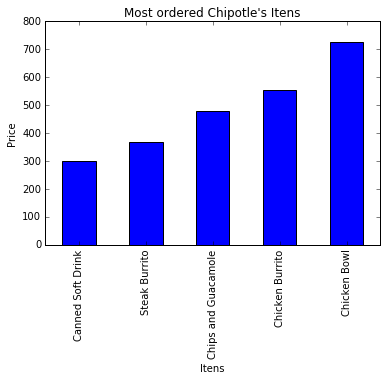

In [4]:
top_5 = chipo.groupby('item_name').quantity.sum().sort_values(ascending=False).head(5)
top_5

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

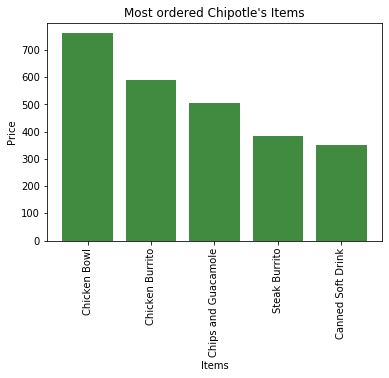

In [5]:
items = np.array(top_5.index)
price = np.array(top_5.values)

fig, ax = plt.subplots(nrows=1, ncols=1)   
ax.bar(items, price, color= 'darkgreen', alpha = 0.75)

ax.set(xlabel="Items", ylabel="Price", title="Most ordered Chipotle's Items")
ax.set_xticklabels(items, rotation=90);

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [6]:
cross_1 = pd.crosstab(chipo['item_price'] ,chipo['quantity'].sum())
cross_1

col_0,4972
item_price,
$1.09,106
$1.25,264
$1.50,117
$1.69,99
$1.99,1
...,...
$8.75,730
$8.90,20
$8.99,246


Text(0, 0.5, 'quantity')

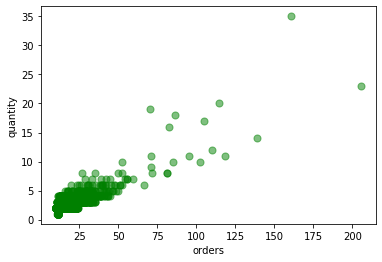

In [7]:
chipo.item_price =  [float(value [1:-1])for value in chipo.item_price]
orders = chipo.groupby('order_id').sum()

plt.scatter(orders.item_price, orders.quantity, s = 50, c = 'green', alpha = 0.5)

plt.xlabel('orders')
plt.ylabel('quantity')

(0, 40.0)

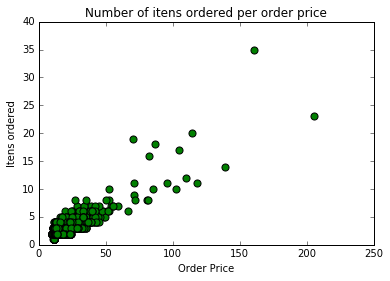

### BONUS: Create a question and a graph to answer your own question.

In [8]:
# Create a scatterplot with the number of items orderered per order price
sth = pd.DataFrame(chipo.groupby('item_price').quantity.sum())
sth.head()

,quantity
item_price,
1.09,106
1.25,264
1.50,117
1.69,99
1.99,1


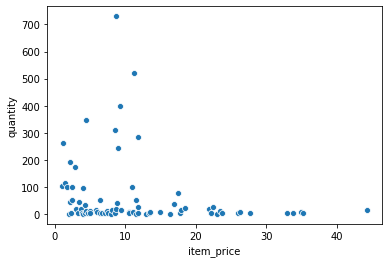

In [9]:
sns.scatterplot(x= sth.index, y = 'quantity', data = sth);

# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [11]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

In [25]:
data = dict(online_rt.groupby('Country').Quantity.sum().sort_values(ascending= False).head(10))
del data['United Kingdom']
data

{'Netherlands': 200128,
 'EIRE': 142637,
 'Germany': 117448,
 'France': 110480,
 'Australia': 83653,
 'Sweden': 35637,
 'Switzerland': 30325,
 'Spain': 26824,
 'Japan': 25218}

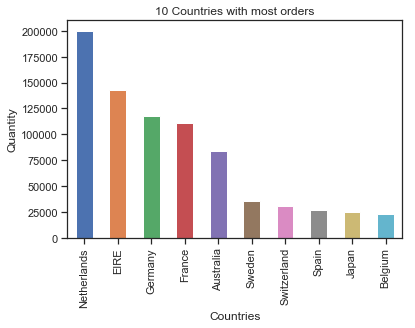

### Step 5.  Exclude negative Quatity entries

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

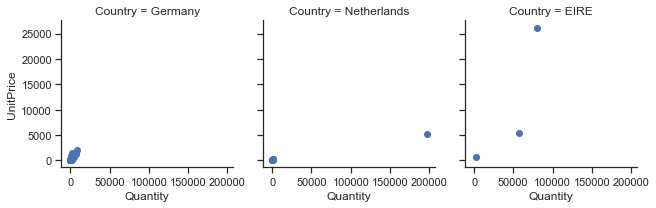

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [13]:
#This takes our initial dataframe groups it primarily by 'CustomerID' and secondarily by 'Country'.
#It sums all the (non-indexical) columns that have numerical values under each group.

#Here's what it looks like:


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [14]:
customers.UnitPrice.dtype
#So it's 'float64'
#But why did we sum 'UnitPrice', to begin with?
#If 'UnitPrice' wasn't something that we were interested in then it would be OK
#since we wouldn't care whether UnitPrice was being summed or not.
#But we want our graphs to reflect 'UnitPrice'!
#Note that summing up 'UnitPrice' can be highly misleading.
#It doesn't tell us much as to what the customer is doing.
#Suppose, a customer places one order of 1000 items that are worth $1 each.
#Another customer places a thousand orders of 1 item worth $1.
#There isn't much of a difference between what the former and the latter customers did.
#After all, they've spent the same amount of money.
#so we should be careful when we're summing columns. Sometimes we intend to sum just one column
#('Quantity' in this case) and another column like UnitPrice gets ito the mix.

NameError: name 'customers' is not defined

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [15]:
#The result is exactly what we'd suspected. Customer 12346.0 placed
#one giant order, whereas 12347.0 placed a lot of smaller orders.
#So we've identified one potential reason why our plots looked so weird at section 6.
#At this stage we need to go back to the initial problem we've specified at section 6.
#And make it more precise.

#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


##### Step 7.3.3 Plot

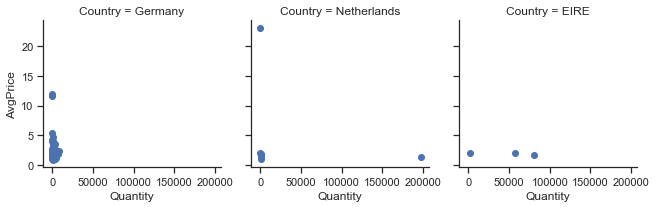

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

In [16]:

#Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

##### Step 7.4.2 Zoom in so we can see that curve more clearly

In [17]:

#And there is still that pattern, this time in close-up!

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [18]:
#These are the values for the graph.


#### 8.3 Plot.

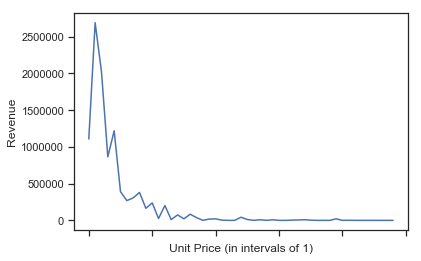

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

In [19]:

#Looks like a major chunk of our revenue comes from items worth $0-$3!

### BONUS: Create your own question and answer it.

# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [20]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
% matplotlib inline

# set seaborn style to white
sns.set_style("white")

UsageError: Line magic function `%` not found.


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [21]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'
tips = pd.read_csv(url)

tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

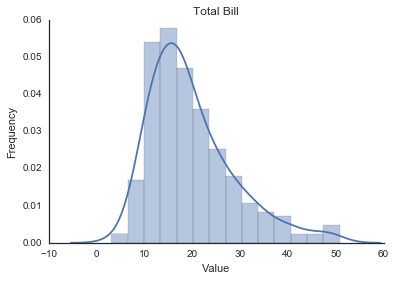

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

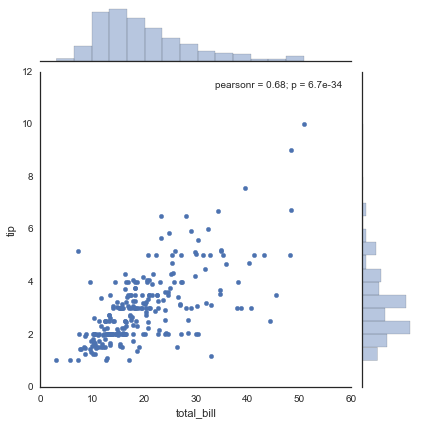

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

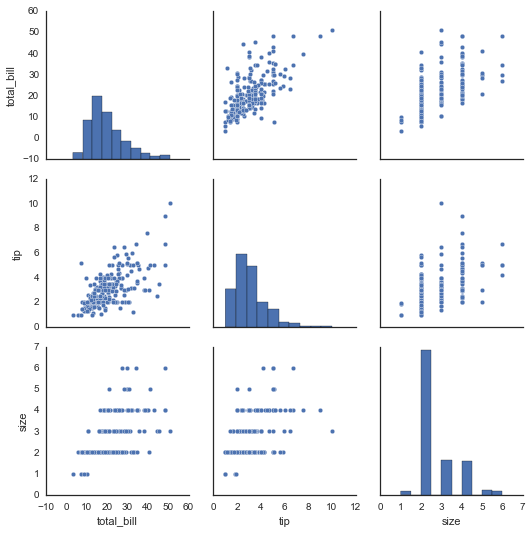

### Step 8. Present the relationship between days and total_bill value

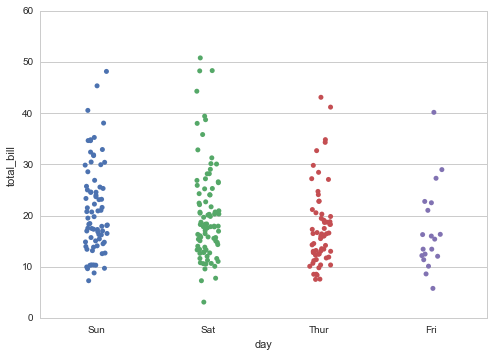

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

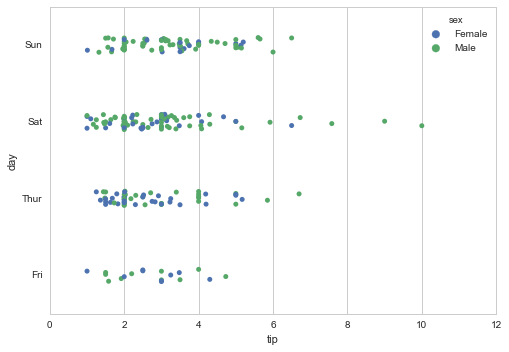

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

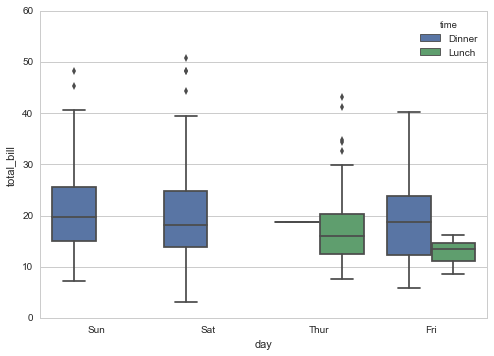

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

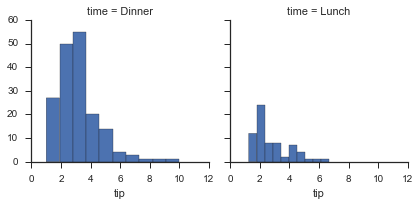

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

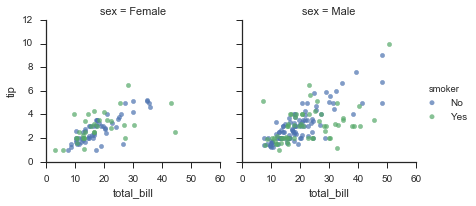

### BONUS: Create your own question and answer it using a graph.

# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv) 

### Step 3. Assign it to a variable titanic 

In [6]:
titanic = pd.read_csv(r'F:\Programacion\1.BOOTCAMP\data\general_dfs\Titanic.csv')
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


### Step 4. Set PassengerId as the index 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

In [9]:
gender_all_class = titanic.Sex.value_counts()
gender_all_class

male      577
female    314
Name: Sex, dtype: int64

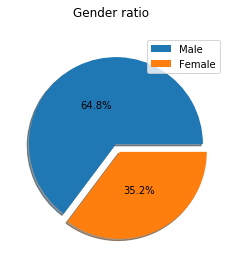

In [94]:
labels = 'Male', 'Female'
explode = 0, 0.1

plt.pie(gender_all_class,  autopct='%1.1f%%', startangle=0, explode= explode, shadow= True, pctdistance = 0.5)
plt.legend(labels, loc= 'best')
plt.suptitle('Gender ratio', fontsize=12)

plt.show()

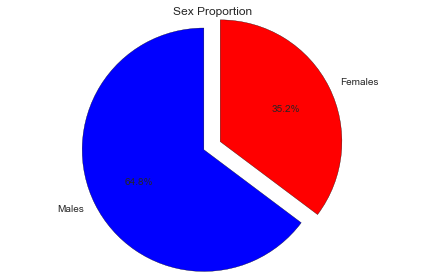

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

In [16]:
titanic.loc[titanic['Age'] < 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


In [18]:
agefix = lambda x: x * 100 if x < 1 else x

In [19]:
titanic.Age = titanic.Age.apply(agefix)

In [20]:
fare_age = titanic.groupby('Age').Fare.sum()
fare_age

Age
1.0     210.0417
2.0     375.3625
3.0     154.6917
4.0     295.4333
5.0      90.8708
          ...   
74.0      7.7750
75.0     38.5166
80.0     30.0000
83.0     47.7500
92.0    151.5500
Name: Fare, Length: 87, dtype: float64

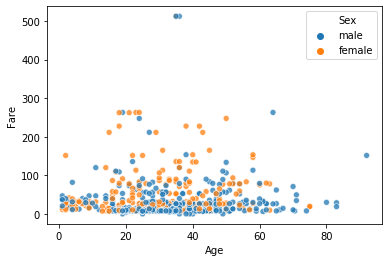

In [25]:
sns.scatterplot(x= 'Age',y= 'Fare', hue= 'Sex', alpha= 0.75, data= titanic)

(-5, 85)

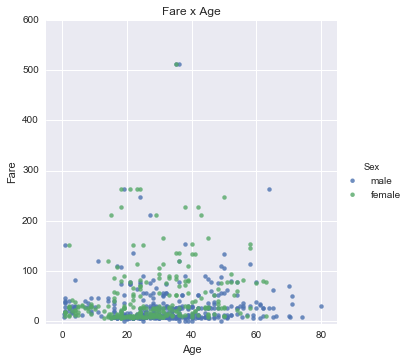

### Step 7. How many people survived?

In [28]:
print (f'This many survided: {titanic.Survived.loc[titanic.Survived == 1].sum()}')

This many survided: 342


342

### Step 8. Create a histogram with the Fare payed

In [92]:
counts = titanic.Fare.value_counts()
Ymax = int(counts.max())
Ymin = int(titanic.Fare.min())

counts.max(), counts.sum(), counts.max() / counts.sum()

(43, 891, 0.04826038159371493)

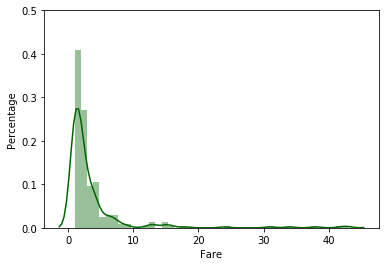

In [93]:
fig, ax = plt.subplots()
ax = sns.distplot(counts, color= 'Darkgreen')
ax.set_ylim(0, 0.5)
ax.set_ylabel('Percentage');

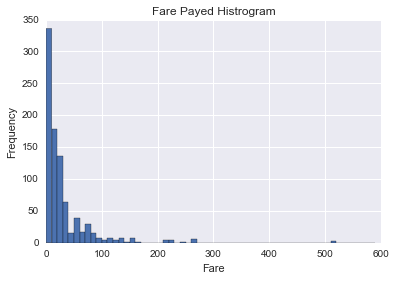

### BONUS: Create your own question and answer it.

In [100]:
class_pas = titanic.groupby('Pclass').Name.count()
class_gend = titanic.groupby('Pclass').Sex.value_counts()

class_pas, class_gend

(Pclass
 1    216
 2    184
 3    491
 Name: Name, dtype: int64, Pclass  Sex   
 1       male      122
         female     94
 2       male      108
         female     76
 3       male      347
         female    144
 Name: Sex, dtype: int64)

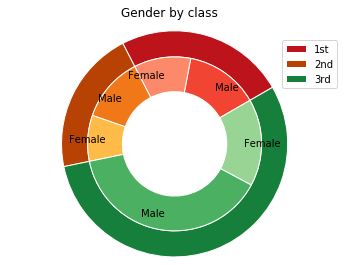

In [109]:
labels = ['1st', '2nd', '3rd']
group_size = class_pas
labels2 = ['Male', 'Female','Male', 'Female','Male', 'Female']
subgroup_size = class_gend
 
# Create colors
a, b, c = [ plt.cm.Reds, plt.cm.YlOrBr, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius = 1.3, colors=[a(0.8), b(0.8), c(0.8)], startangle = 30)
plt.setp( mypie, width=0.3, edgecolor ='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labeldistance=0.8, colors=[a(0.6), a(0.4), b(0.6), b(0.4), c(0.6), c(0.4)], labels = labels2, startangle = 30)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
plt.legend(labels, loc= 'best')
plt.suptitle('Gender by class', fontsize=12) 
plt.show()